In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2722,s2723,Movie,Duplicate,Mahesh Bhatt,"Shah Rukh Khan, Juhi Chawla, Sonali Bendre, Fa...",India,"April 1, 2020",1998,TV-14,165 min,"Comedies, Dramas, International Movies",Hilarious mix-ups and deadly encounters ensue ...
1669,s1670,Movie,If Anything Happens I Love You,"Will McCormack, Michael Govier",NaN,United States,"November 20, 2020",2020,PG,13 min,Dramas,Grieving parents journey through an emotional ...
4997,s4998,TV Show,Borderliner,NaN,"Tobias Santelmann, Ellen Dorrit Petersen, Benj...","Norway, Germany, Sweden","March 6, 2018",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","To protect his family, a police detective cove..."
1536,s1537,Movie,Incarnate,Brad Peyton,"Aaron Eckhart, Carice van Houten, Catalina San...",United States,"December 16, 2020",2016,PG-13,87 min,"Horror Movies, Thrillers",An unconventional demon hunter faces his great...
3099,s3100,Movie,Grand-Daddy Day Care,Ron Oliver,"Danny Trejo, Reno Wilson, Margaret Avery, Barr...",United States,"December 25, 2019",2019,PG-13,96 min,"Children & Family Movies, Comedies",A frustrated novelist with money problems open...


DATA EXPLORATION

In [5]:
#total number of shows and movies
type_counts=df['type'].value_counts()
type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

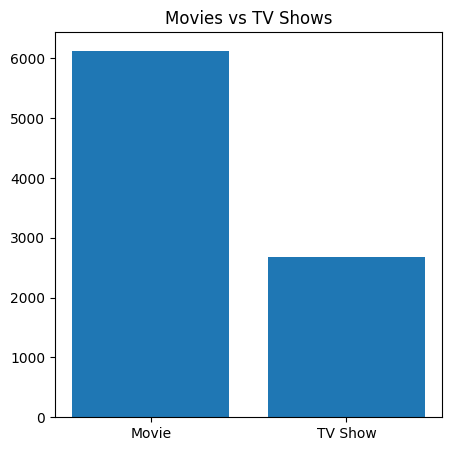

In [6]:
plt.figure(figsize=(5,5))
plt.bar(type_counts.index, type_counts.values)
plt.title('Movies vs TV Shows')
plt.show()

In [7]:
#Which country produces the most content?
#Handling missing values
df = df.dropna(subset=['country'])
content_counts = df['country'].value_counts()
top_country = content_counts.idxmax()
top_count = content_counts.max()
print(f"Country producing most Netflix content is {top_country} with {top_count} titles.")

Country producing most Netflix content is United States with 2818 titles.


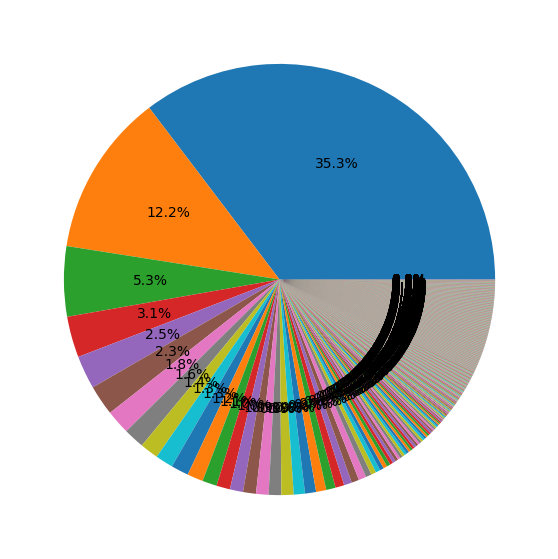

In [8]:
plt.figure(figsize=(7,7))
plt.pie(content_counts, autopct='%1.1f%%')
plt.show()

CONTENT ANALYSIS

In [25]:
# Most prolific directors and actors
director_df = df.dropna(subset=['director'])
top_directors = director_df.groupby("director").size().sort_values(ascending=False).head()
top_directors

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
dtype: int64

Text(0, 0.5, 'Shows')

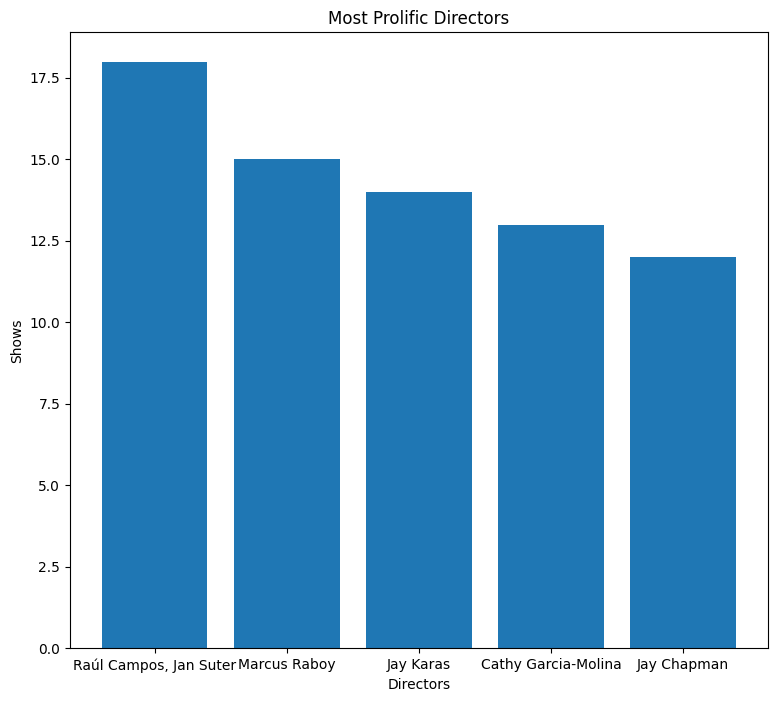

In [ ]:
plt.figure(figsize=(9,8))
plt.bar(top_directors.index, top_directors.values)
plt.title('Most Prolific Directors')
plt.xlabel('Directors')
plt.ylabel('Shows')